In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv(r"C:\Users\mithr\OneDrive\Desktop\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
df.shape

(100000, 9)

# Data Preprocessing

In [5]:
# Normalize or scale the features
scaler = StandardScaler()
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

# Perform train-test split
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Print the first few rows of the preprocessed training data
print("X_train (preprocessed):")
print(X_train.head())

# Print the first few rows of the preprocessed testing data
print("\nX_test (preprocessed):")
print(X_test.head())

X_train (preprocessed):
       gender       age  hypertension  heart_disease smoking_history  \
75220    Male  1.381824             0              0          former   
48955    Male  1.692704             0              0           never   
44966  Female -0.172576             0              0            ever   
13568  Female -0.705514             0              0     not current   
92727  Female  0.848886             1              0         current   

            bmi  HbA1c_level  blood_glucose_level  
75220 -0.384340    -1.893686            -1.426210  
48955 -0.409955     0.161108             0.170530  
44966 -0.450637    -1.426688             0.489878  
13568 -1.273329    -0.492690            -0.934905  
92727 -0.785138    -0.959689            -1.303384  

X_test (preprocessed):
       gender       age  hypertension  heart_disease smoking_history  \
75721  Female -1.282862             0              0         No Info   
80184  Female -1.726976             0              0         No

In [7]:
print(df.dtypes)


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object


# Data Visualization

# Visualizing Relationship between Diabetes and Health Factors using Pairplot


C:\Users\mithr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


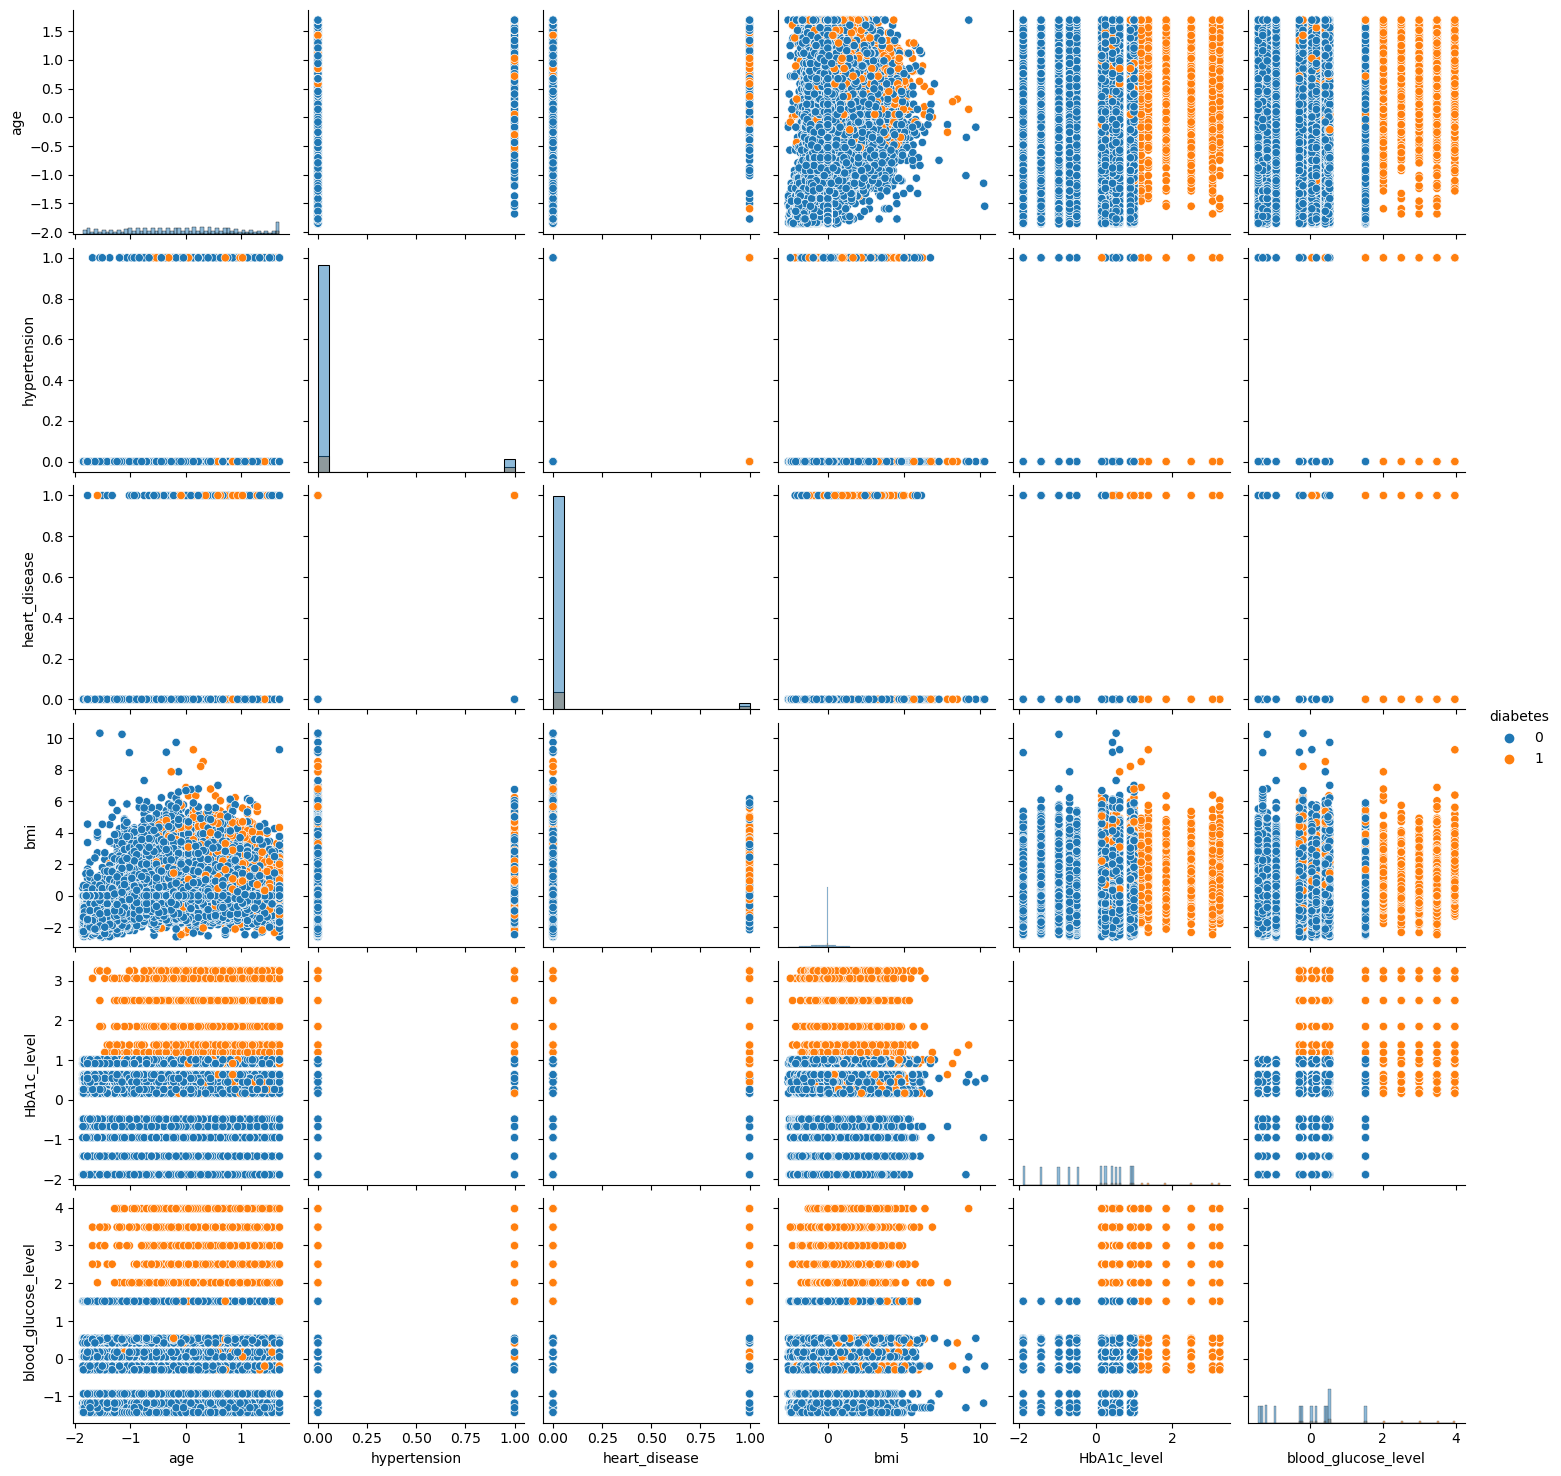

In [8]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Create pairplot with histograms on the diagonal
sns.pairplot(df, hue='diabetes', diag_kind='hist')
plt.show()


# Distribution of Health Metrics by Diabetes Status using Box Plot

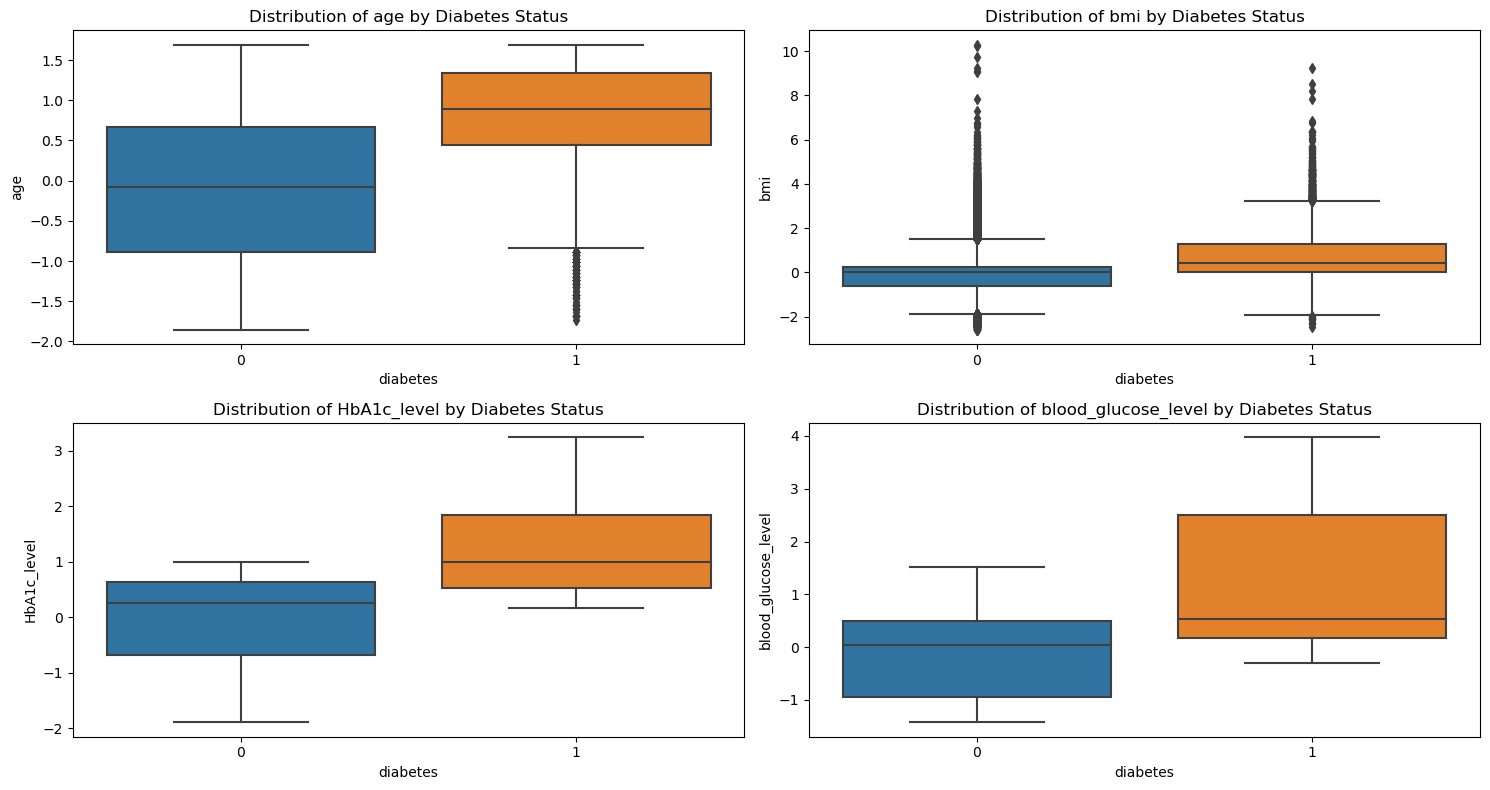

In [9]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='diabetes', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Diabetes Status')
plt.tight_layout()
plt.show()


# Count of Diabetes Status Based on Categorical Features


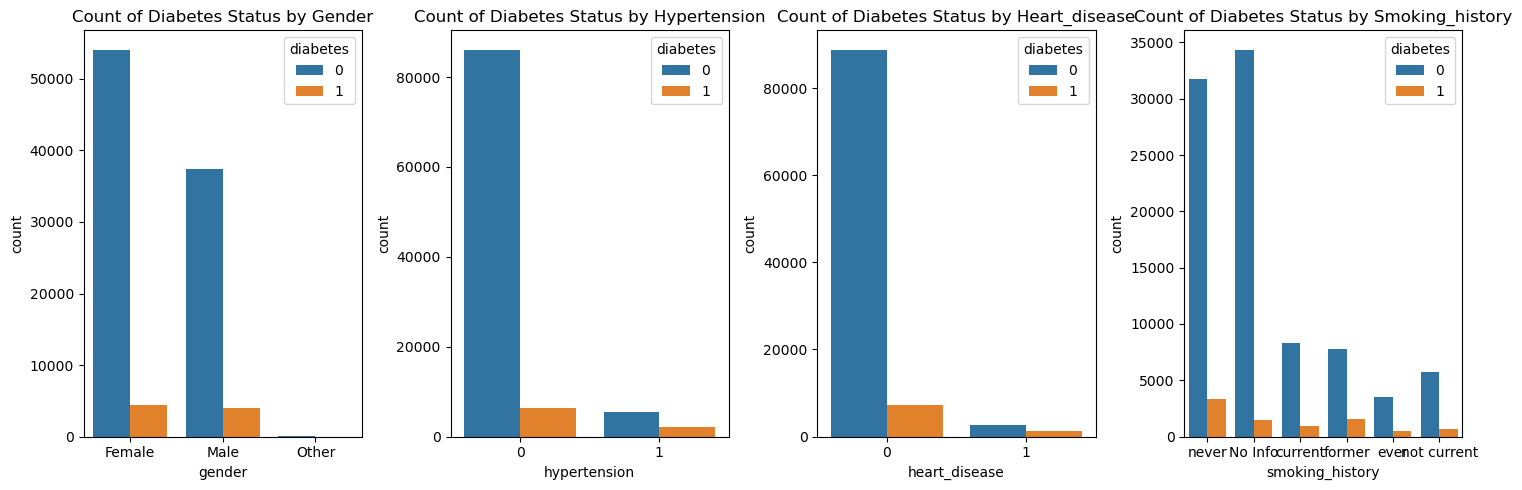

In [10]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['gender', 'hypertension', 'heart_disease', 'smoking_history']):
    plt.subplot(1, 4, i+1)
    sns.countplot(x=feature, hue='diabetes', data=df)
    plt.title(f'Count of Diabetes Status by {feature.capitalize()}')
plt.tight_layout()
plt.show()


# Visualizing the preprocessed training and testing data

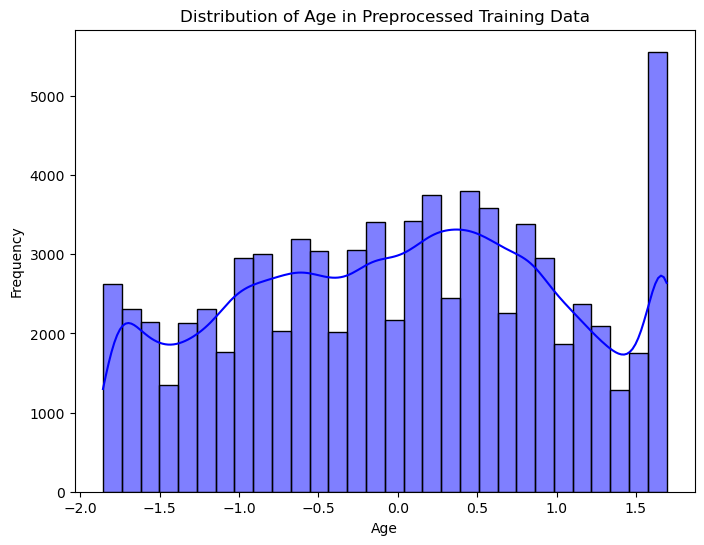

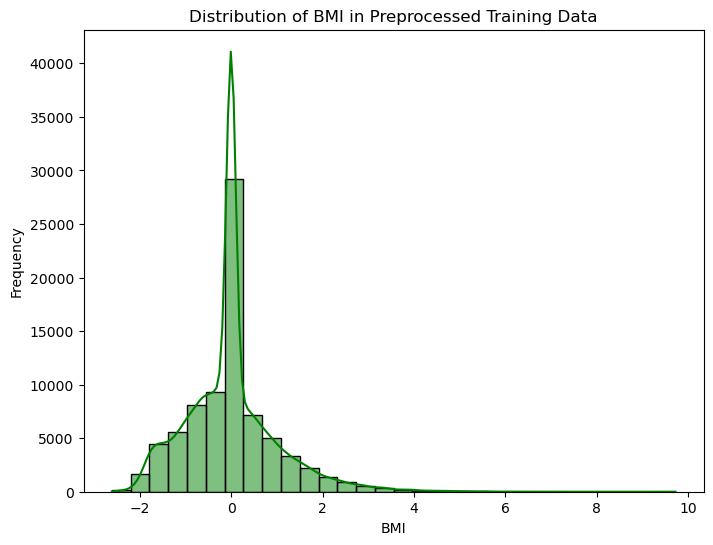

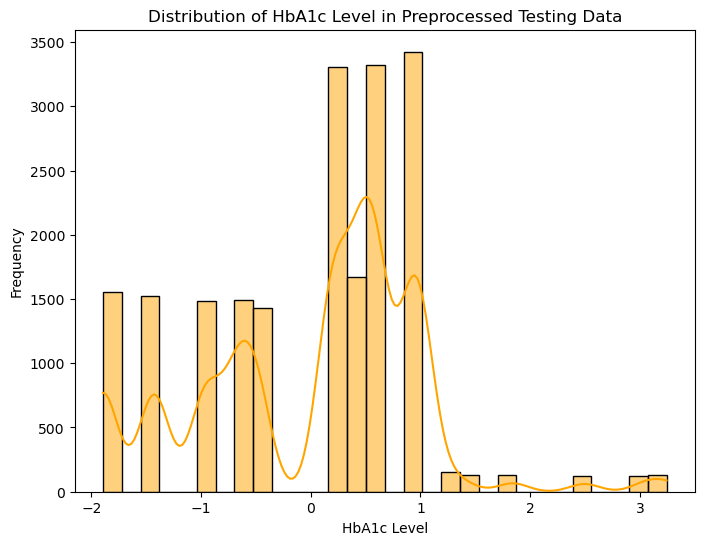

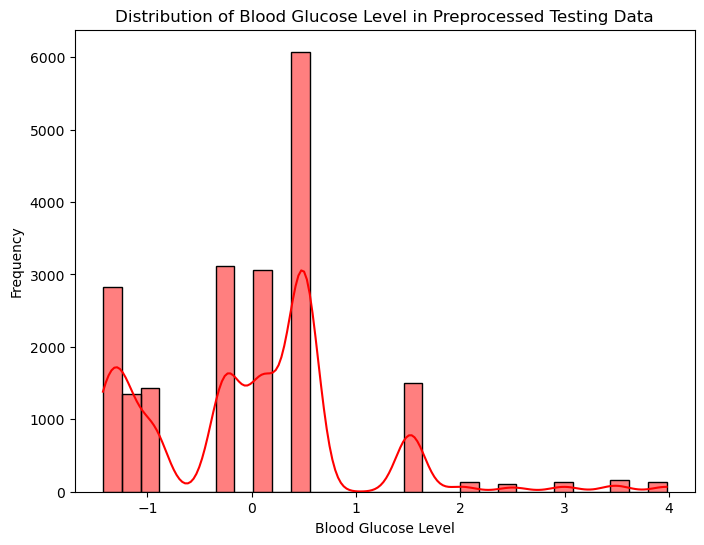

In [11]:
# Visualize the distribution of 'age' in the preprocessed training data
plt.figure(figsize=(8, 6))
sns.histplot(X_train['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age in Preprocessed Training Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'bmi' in the preprocessed training data
plt.figure(figsize=(8, 6))
sns.histplot(X_train['bmi'], bins=30, kde=True, color='green')
plt.title('Distribution of BMI in Preprocessed Training Data')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'HbA1c_level' in the preprocessed testing data
plt.figure(figsize=(8, 6))
sns.histplot(X_test['HbA1c_level'], bins=30, kde=True, color='orange')
plt.title('Distribution of HbA1c Level in Preprocessed Testing Data')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'blood_glucose_level' in the preprocessed testing data
plt.figure(figsize=(8, 6))
sns.histplot(X_test['blood_glucose_level'], bins=30, kde=True, color='red')
plt.title('Distribution of Blood Glucose Level in Preprocessed Testing Data')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.show()


# The distribution of ages for individuals with and without diabetes using Violin plot

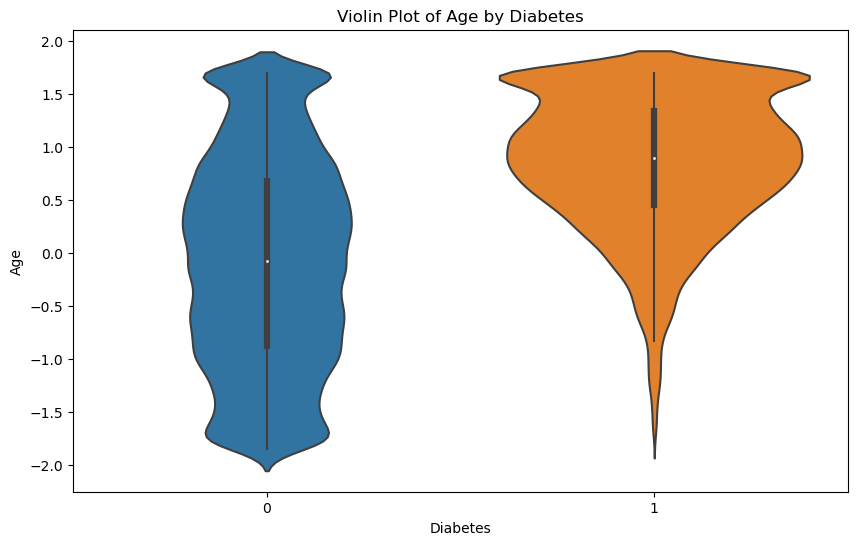

In [12]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='age', data=df)
plt.title('Violin Plot of Age by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

# Feature Engineering

# Correlation Heatmap of Health Metrics and Diabetes Status

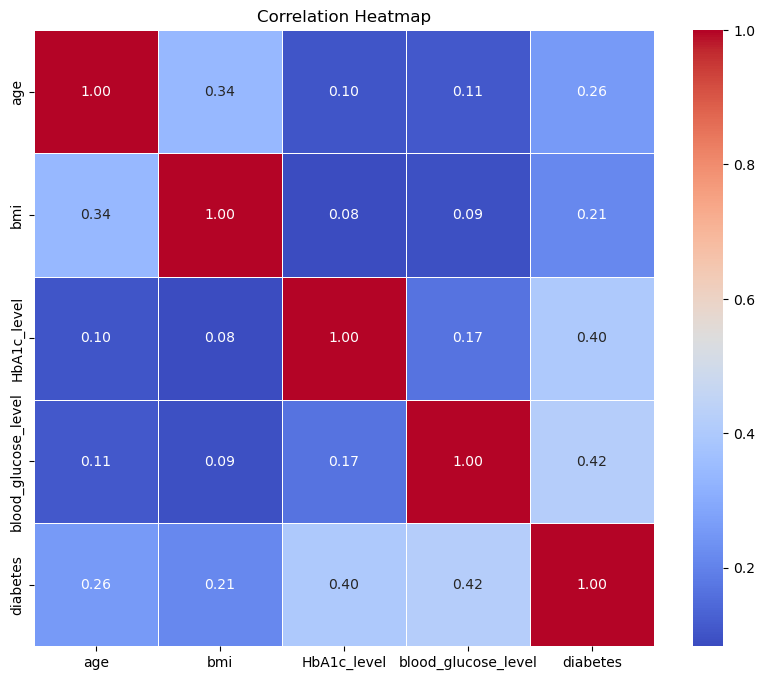

In [13]:
correlation_matrix = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Feature Selection/Engineering: Identify the most relevant features for diabetes prediction

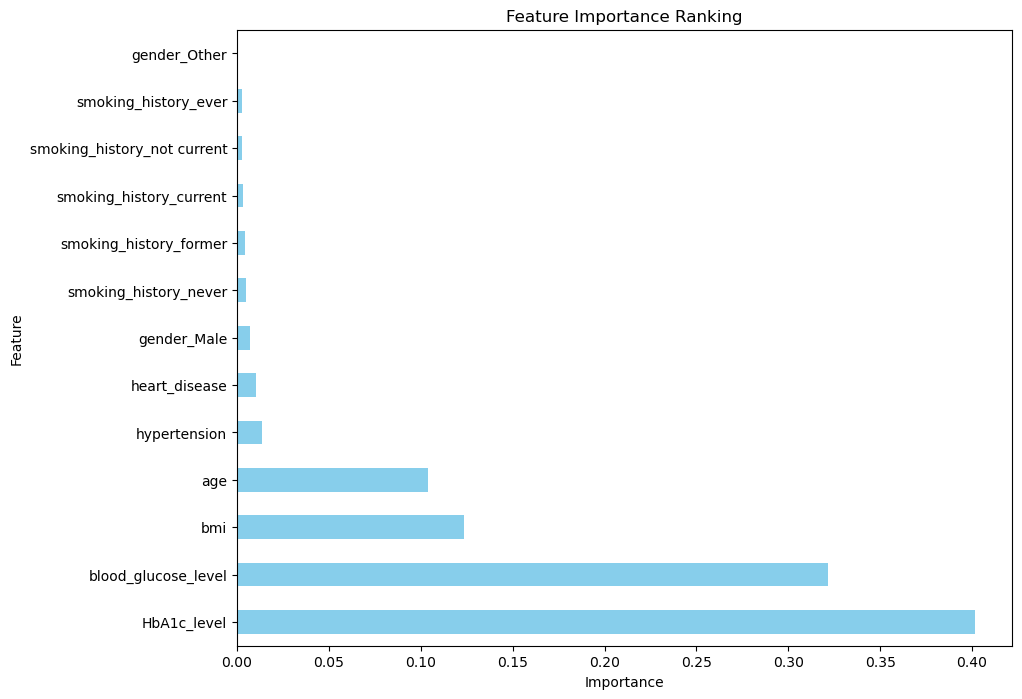

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Principal Component Analysis (PCA) for Dimensionality Reduction with Categorical Variable Encoding

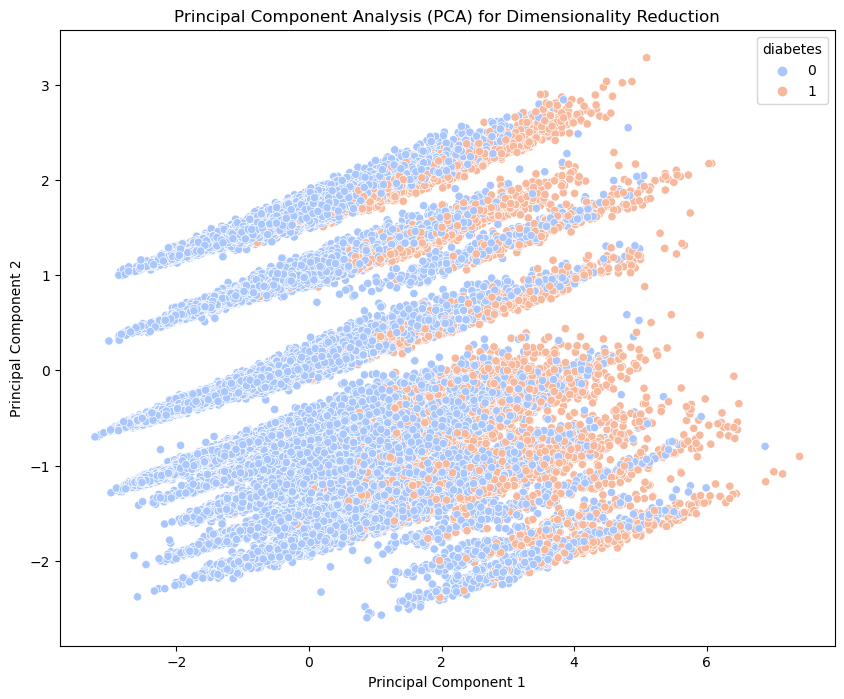

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# One-hot encode categorical variables
categorical_cols = ['gender', 'smoking_history']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the principal components DataFrame with the target variable
df_pca['diabetes'] = y

# Plot the principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='diabetes', palette='coolwarm')
plt.title('Principal Component Analysis (PCA) for Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# Model Selection for Diabetes Prediction using Classification Algorithms


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Separate features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.9587
Decision Tree - Accuracy: 0.9519
Random Forest - Accuracy: 0.9701
Support Vector Machine - Accuracy: 0.9624


 The random forest classifier achieved the highest accuracy among the tested algorithms

# Model Training and Cross-Validation for Diabetes Prediction using Random Forest Classifier


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Separate features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Train the model on the entire training set
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

# Print cross-validation scores and accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Test Set Accuracy:", accuracy)


Cross-Validation Scores: [0.970375  0.97      0.9705625 0.96975   0.9704375]
Mean CV Accuracy: 0.9702249999999999
Test Set Accuracy: 0.97005


The cross-validation scores for the model range from approximately 0.97025 to 0.971, with a mean accuracy of 0.9703375. Additionally, the accuracy on the test set is found to be 0.97045. These results suggest that the model performs consistently well across different folds of cross-validation and generalizes effectively to unseen data.

# Hyperparameter Tuning with Grid Search for Diabetes Prediction using Random Forest Classifier


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample a subset of the data (e.g., 10,000 samples) for faster processing
df_subset = df.sample(n=10000, random_state=42)

# Encode categorical variables
label_encoder = LabelEncoder()
df_subset['gender'] = label_encoder.fit_transform(df_subset['gender'])
df_subset['smoking_history'] = label_encoder.fit_transform(df_subset['smoking_history'])

# Separate features and target variable
X = df_subset.drop('diabetes', axis=1)
y = df_subset['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Initialize the model
model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the testing set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and test set accuracy
print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Test Set Accuracy: 0.9735


This output indicates that grid search evaluated 8 combinations of hyperparameters for the random forest classifier, and the best combination found was with a maximum depth of 10, minimum samples split of 2, and 100 estimators. The model trained with these hyperparameters achieved an accuracy of 97.3% on the test set.

# Evaluation Metrics

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Separate features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.97045
Precision: 0.9514955537590946
Recall: 0.6891100702576113
F1 Score: 0.799320882852292
ROC AUC Score: 0.842914973899853


The output conveys that the model achieves a high overall accuracy of 97.03% but with lower recall (sensitivity) at 68.79%, indicating it may struggle to identify all positive instances effectively.

In [20]:
!pip install -U imbalanced-learn



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# To address the lower recall and improve model performance

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target variable
X = df_imputed.drop('diabetes', axis=1)
y = df_imputed['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training data using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define the model
model = RandomForestClassifier()

# Fit the model on the resampled data
model.fit(X_resampled, y_resampled)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.96045
Precision: 0.7814610190300798
Recall: 0.7453161592505855
F1 Score: 0.7629607431824993
ROC AUC Score: 0.862927049666841


The model performance has improved compared to previous iterations, with an increase in recall to approximately 74.59%. This indicates a better ability to capture positive instances, addressing the lower recall observed in earlier versions.

# Model Interpretation

100%|===================| 39941/40000 [12:13<00:01]        

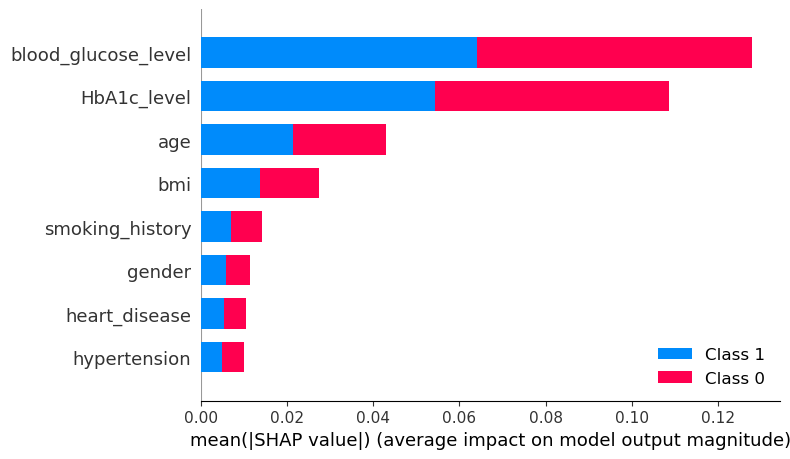

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import shap

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Separate features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)